In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv("/content/drive/MyDrive/ds_project/heart_attack_prediction_dataset.csv")

In [42]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0




---



# **1.Data Cleaning and EDA:**

In [43]:
def remove_extreme_outliers(df):
    # Select numeric columns, excluding binary columns
    numeric_cols = [
        col for col in df.select_dtypes(include=['number']).columns
        if df[col].nunique() > 2  # Exclude columns with 2 or fewer unique values
    ]
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Calculate lower and upper bounds for extreme outliers
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Filter rows within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to remove extreme outliers
df = remove_extreme_outliers(df)

# Print the cleaned DataFrame
print(df)

     Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0  ...   
1            1       

checking for any null or Nan values

In [44]:
df.isnull().sum().sum()

0

renaming columns to camel case

In [45]:
column_mapping = {
    'Age': 'age',
    'Sex': 'sex',
    'Cholesterol': 'cholesterol',
    'Blood Pressure': 'bloodPressure',
    'Heart Rate': 'heartRate',
    'Diabetes': 'diabetes',
    'Family History': 'familyHistory',
    'Smoking': 'smoking',
    'Obesity': 'obesity',
    'Alcohol Consumption': 'alcoholConsumption',
    'Exercise Hours Per Week': 'exerciseHoursPerWeek',
    'Diet': 'diet',
    'Previous Heart Problems': 'previousHeartProblems',
    'Medication Use': 'medicationUse',
    'Stress Level': 'stressLevel',
    'Sedentary Hours Per Day': 'sedentaryHoursPerDay',
    'Income': 'income',
    'BMI': 'bmi',
    'Triglycerides': 'triglycerides',
    'Physical Activity Days Per Week': 'physicalActivityDaysPerWeek',
    'Sleep Hours Per Day': 'sleepHoursPerDay',
    'Family Size': 'familySize',
    'Country': 'country',
    'Region': 'region',
    'Continent': 'continent',
    'Age Group': 'ageGroup',
    'Hemisphere': 'hemisphere',
    'Heart Attack Risk': 'heartAttackRisk'

}
df = df.rename(columns=column_mapping)

checking dtypes

In [46]:
df.dtypes

,0
Patient ID,object
age,int64
sex,object
cholesterol,int64
bloodPressure,object
heartRate,int64
diabetes,int64
familyHistory,int64
smoking,int64
obesity,int64


we want to convert values for blood pressure, sex, and diet into integers so we can do data analysis on them more easily. to achieve this, bloodPressure is separated into two columns with the systolic and diastolic blood pressures. gender and diet are just assigned integer values.

In [47]:
df[['systolicBloodPressure', 'diastolicBloodPressure']] = df['bloodPressure'].str.split('/', expand=True)

df['systolicBloodPressure'] = df['systolicBloodPressure'].astype(int)
df['diastolicBloodPressure'] = df['diastolicBloodPressure'].astype(int)
df['sex'] = df['sex'].replace({'Male': '1', 'Female': '0'}).astype(int)
df['diet'] = df['diet'].replace({'Healthy': '0', 'Average': '1', 'Unhealthy': '2'}).astype(int)
df.dtypes


,0
Patient ID,object
age,int64
sex,int64
cholesterol,int64
bloodPressure,object
heartRate,int64
diabetes,int64
familyHistory,int64
smoking,int64
obesity,int64


we want to see the correlation heatmap for numerical variables with heart attack risk, and with eachother. we do this in two steps as there are too many variables for one heatmap.

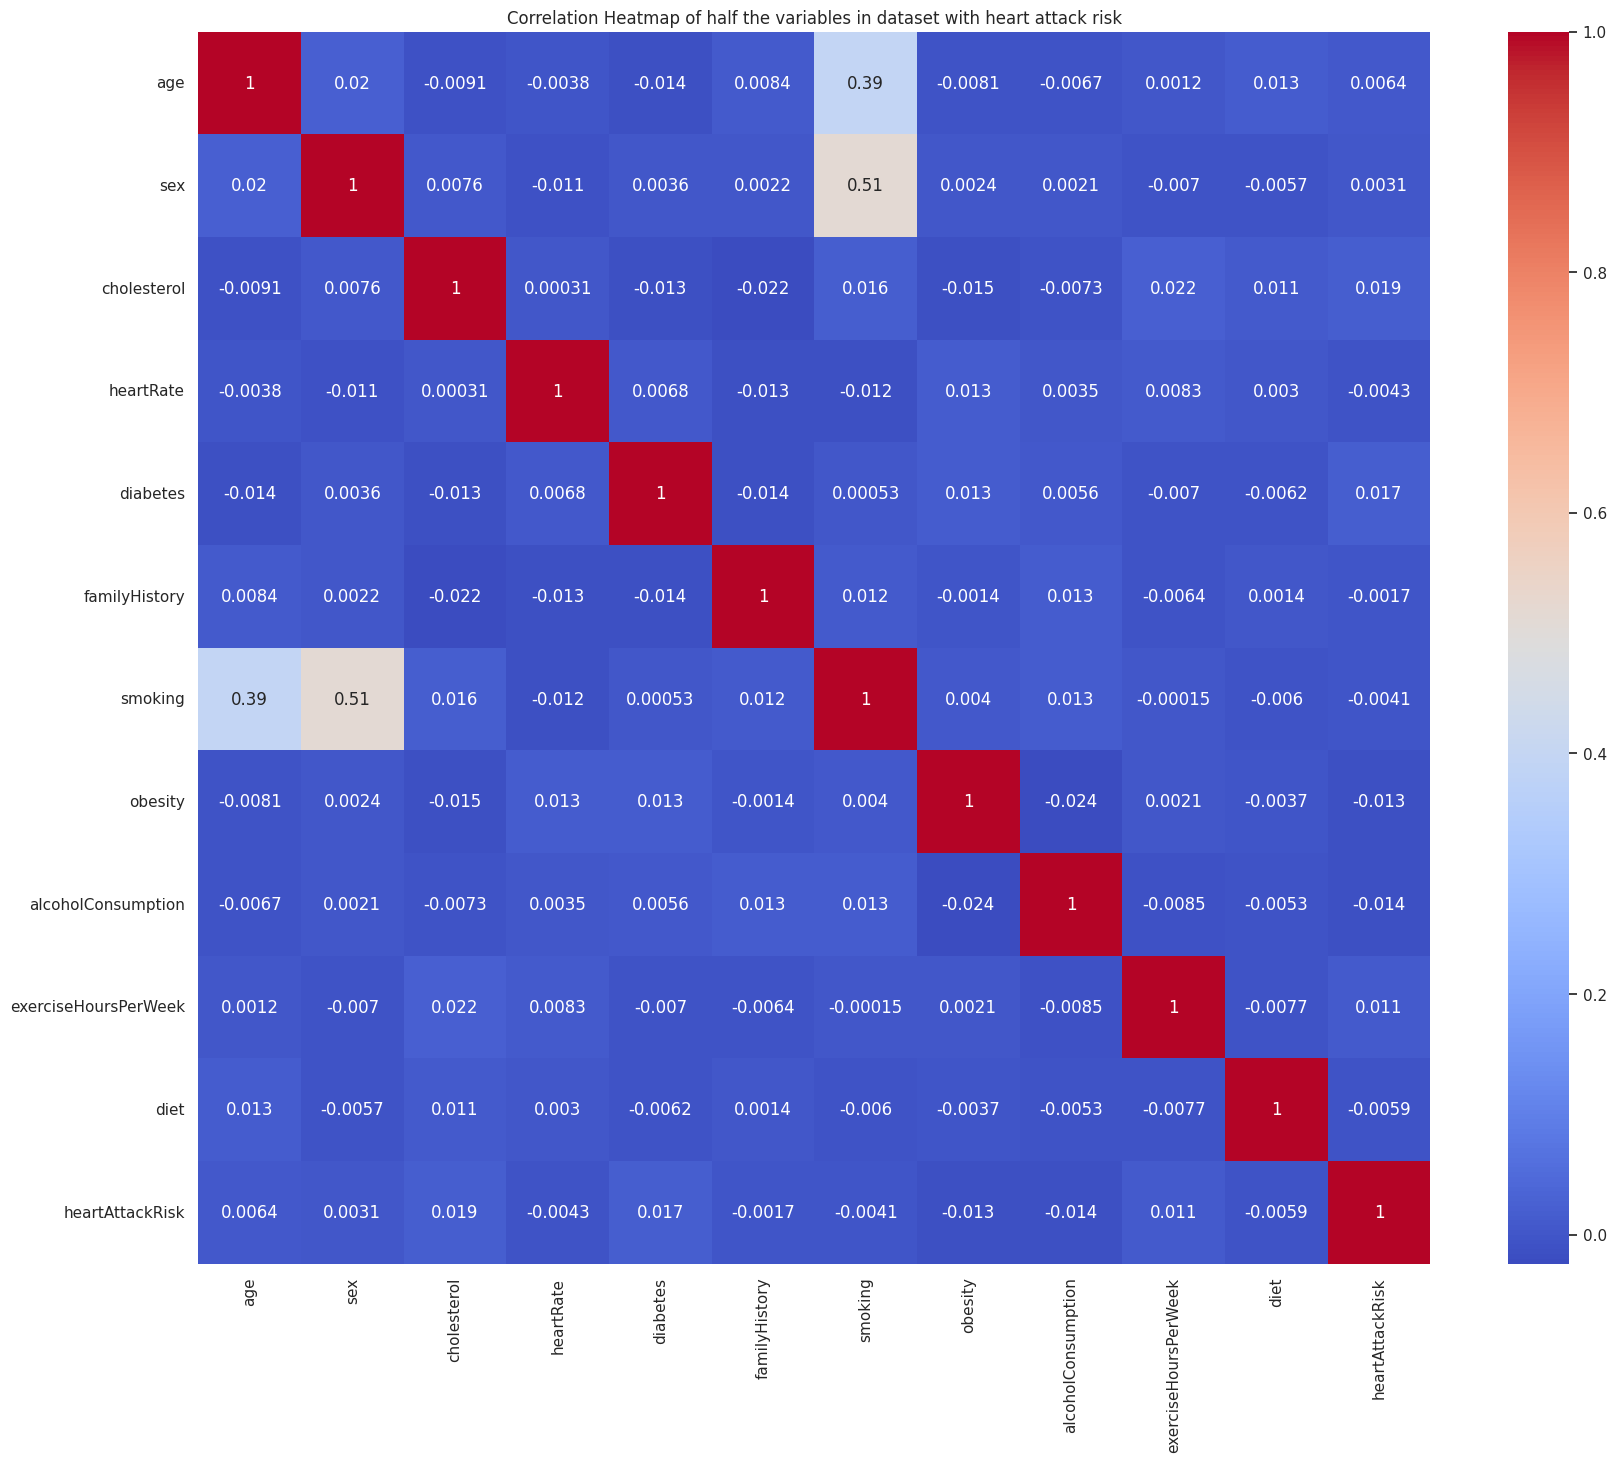

In [48]:
correlation_data = df[[
                       'age',
                       'sex',
                       'cholesterol',
                       'heartRate',
                       'diabetes',
                       'familyHistory',
                       'smoking',
                       'obesity',
                       'alcoholConsumption',
                       'exerciseHoursPerWeek',
                       'diet',
                       'heartAttackRisk'
                        ]]

correlation_matrix = correlation_data.corr()

# Step 3: Create a heatmap to visualize the correlation
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of half the variables in dataset with heart attack risk')
plt.show()

* This heatmap shows us that cholesterol and diabetes have a decently strong correlation with heart attack risk. Age has a weaker correlation but is also usable. These variables can make good indicators for our model.

* The number of hours of exercise also has a significant positive correlation with heart attack risk which is suspicious. On the other hand, smoking, obesity, alcohol consumption and bad diet are inversely correlated with heart attack risk. This is obviously suspicious as well since all of those are well researched indicators of bad health and especially bad cardiac health. we will look deeper into them to see if they offer any value or should be dropped

* Family history has a very insignificant correlation with heart attack risk and might be dropped



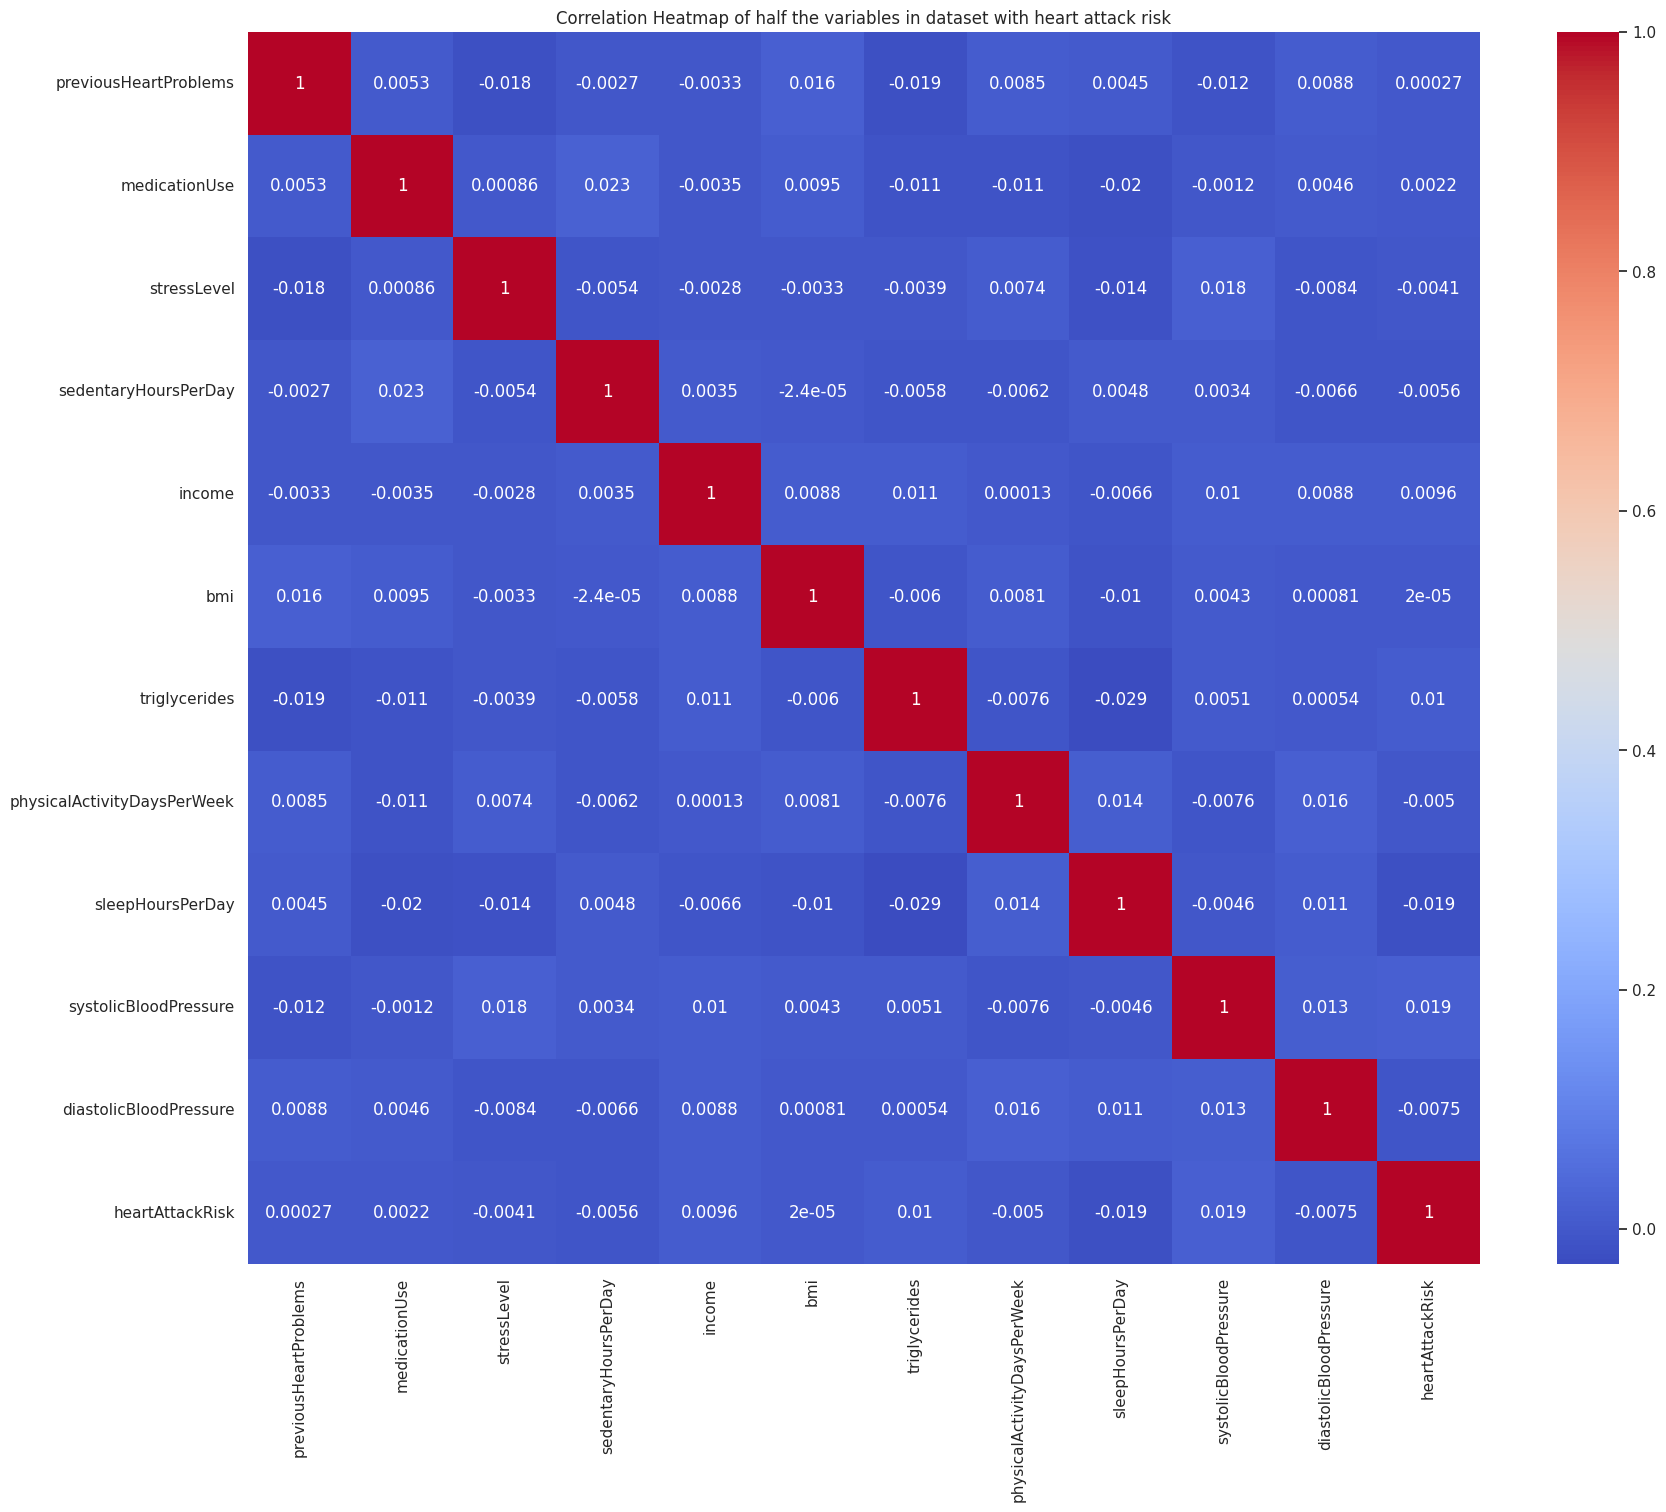

In [49]:
correlation_data1 = df[[
                       'previousHeartProblems',
                       'medicationUse',
                       'stressLevel',
                       'sedentaryHoursPerDay',
                       'income',
                       'bmi',
                       'triglycerides',
                       'physicalActivityDaysPerWeek',
                       'sleepHoursPerDay',
                       'systolicBloodPressure',
                       'diastolicBloodPressure',
                       'heartAttackRisk'

                         ]]
correlation_matrix1 = correlation_data1.corr()

# Step 3: Create a heatmap to visualize the correlation
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of half the variables in dataset with heart attack risk')
plt.show()

* The above heatmap shows us that income, triglycerides, and systolic blood pressure have a good correlation with heart attack risk. Diastolic blood pressure, hours of sleep per day and physical activity days per week, meanwhile, have an inverse correlation with heart attack risk. This means that them being low leads to increased risk of heart attack. All of these factors make logical sense. We can use all six of these variables for predicting heart attack risk as well.

* sedentary hours per day has low negative correlation with heart attack risk. This implies being more sedentary decreases heart attack risk. which is contradictory to widely accepted research. The column may be dropped

* previous heart problems, medication use, stress level and bmi have rather weak correlation and might be dropped.






---



lets have a detailed look at variables that seem to behave contrary to expectations with countplots and percentages.

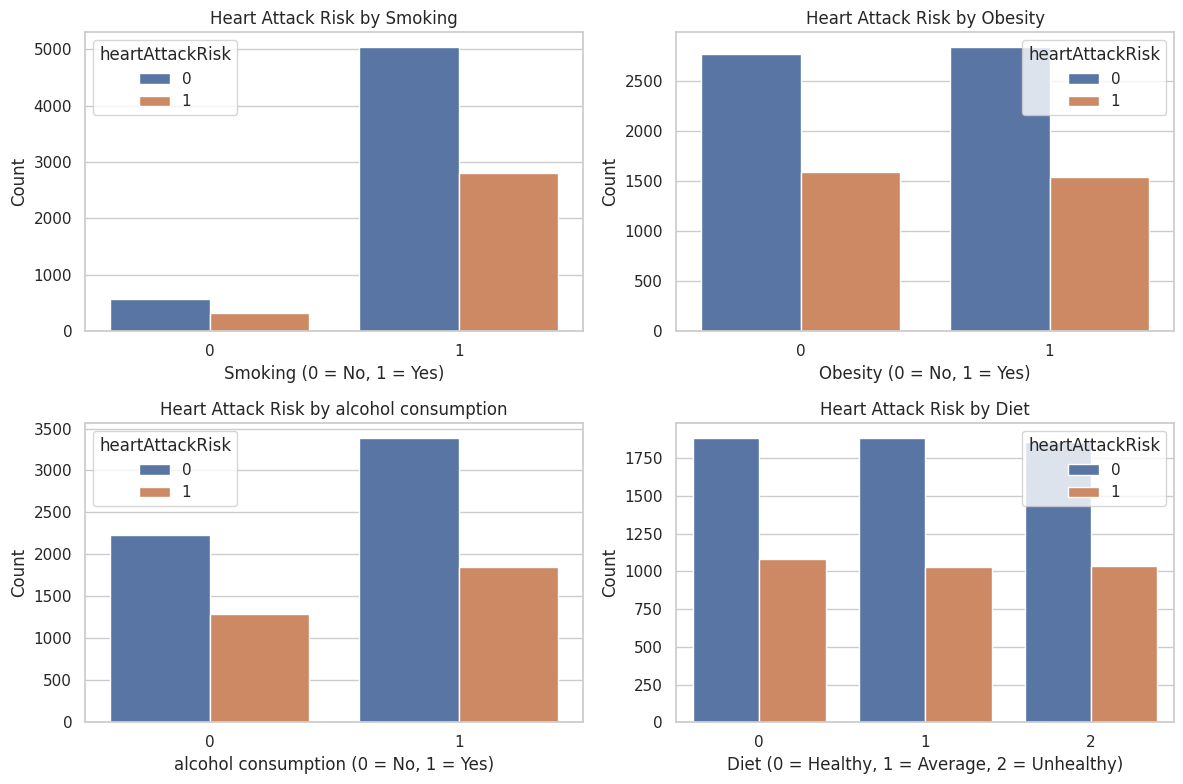

In [50]:
sns.set(style="whitegrid")

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot heartAttackRisk by smoking
sns.countplot(x='smoking', hue='heartAttackRisk', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Heart Attack Risk by Smoking")
axes[0, 0].set_xlabel("Smoking (0 = No, 1 = Yes)")
axes[0, 0].set_ylabel("Count")

# Plot heartAttackRisk by obesity
sns.countplot(x='obesity', hue='heartAttackRisk', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Heart Attack Risk by Obesity")
axes[0, 1].set_xlabel("Obesity (0 = No, 1 = Yes)")
axes[0, 1].set_ylabel("Count")

# Plot heartAttackRisk by alchol consumption
sns.countplot(x='alcoholConsumption', hue='heartAttackRisk', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Heart Attack Risk by alcohol consumption")
axes[1, 0].set_xlabel("alcohol consumption (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel("Count")

# Plot heartAttackRisk by diet
sns.countplot(x='diet', hue='heartAttackRisk', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Heart Attack Risk by Diet")
axes[1, 1].set_xlabel("Diet (0 = Healthy, 1 = Average, 2 = Unhealthy)")
axes[1, 1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
(df[df["smoking"]== 1].shape[0]/df.shape[0])*100

89.68389820837612

In [52]:
(df[df["familyHistory"]== 1].shape[0]/df.shape[0])*100

49.29818555289284

In [53]:
(df[df["sex"]== 1].shape[0]/df.shape[0])*100

69.73639164669633

In [54]:
(df[df["diabetes"]== 1].shape[0]/df.shape[0])*100

65.22880292137397

In [55]:
(df[df["alcoholConsumption"]== 1].shape[0]/df.shape[0])*100

59.80828483396097

In [56]:
(df[df["previousHeartProblems"]== 1].shape[0]/df.shape[0])*100

49.58347597854616

In [57]:
(df[df["obesity"]== 1].shape[0]/df.shape[0])*100

50.14264521282665

In [58]:
(df[df["heartAttackRisk"]== 1].shape[0]/df.shape[0])*100

35.82106584503024

In [59]:
(df[df["diet"]== 2].shape[0]/df.shape[0])*100

32.99098482254936

insights from above analysis:


*   dropping smoking column makes sense as 90% of datapoints are smokers, which is very far off from an accurate sample for the population.
*   70% of the dataset is male which makes any gender based analysis tough.



In [60]:
df = df.drop("smoking", axis=1)



---


lets slice dataframe into subframes for different age groups for a more detailed age based analysis and check age distribution in the dataset for analysis:

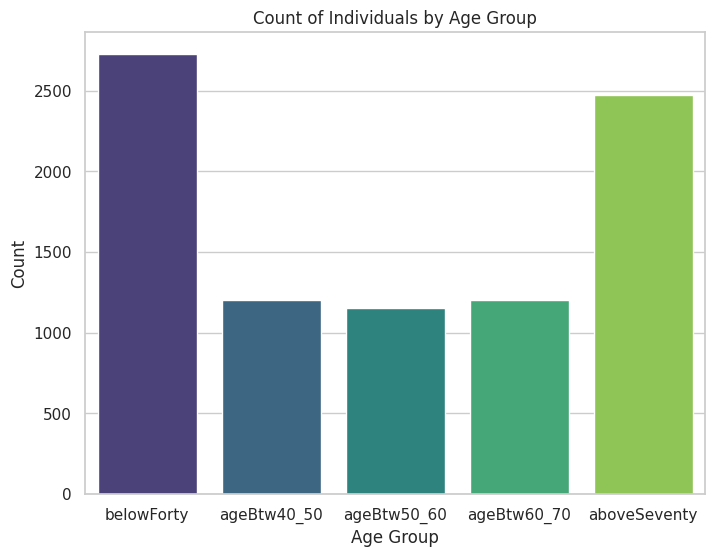

In [61]:
belowForty = df.loc[df['age'] < 40]
ageBtw40_50 = df.loc[(df['age'] >= 40) & (df['age'] < 50)]
ageBtw50_60 = df.loc[(df['age'] >= 50) & (df['age'] < 60)]
ageBtw60_70 = df.loc[(df['age'] >= 60) & (df['age'] < 70)]
aboveSeventy = df.loc[df['age'] >= 70]

age_group_counts = {
    'belowForty': len(belowForty),
    'ageBtw40_50': len(ageBtw40_50),
    'ageBtw50_60': len(ageBtw50_60),
    'ageBtw60_70': len(ageBtw60_70),
    'aboveSeventy': len(aboveSeventy)
}

# Convert to DataFrame for easy plotting
age_group_counts_df = pd.DataFrame(list(age_group_counts.items()), columns=['Age Group', 'Count'])

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
x='Age Group'
sns.barplot(x=x, y='Count',hue=x, data=age_group_counts_df, palette = 'viridis')
plt.title("Count of Individuals by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()


the distribution of ages is peculiar as you would expect it to taper off at higher ages, however, we have a peak at above Seventy age. this could be explained by a sampling frame that focuses on high risk people or people more regulary visiting hospitals.

In [62]:
age_groups = {
    'belowForty': belowForty['heartAttackRisk'].mean() * 100,
    'ageBtw40_50': ageBtw40_50['heartAttackRisk'].mean() * 100,
    'ageBtw50_60': ageBtw50_60['heartAttackRisk'].mean() * 100,
    'ageBtw60_70': ageBtw60_70['heartAttackRisk'].mean() * 100,
    'aboveSeventy': aboveSeventy['heartAttackRisk'].mean() * 100
}

# Convert to DataFrame for easier display
pivot_table_age = pd.DataFrame(list(age_groups.items()), columns=['Age Group', 'heartAttackRisk(%)'])

# Set Age Group as index
pivot_table_age.set_index('Age Group', inplace=True)
pivot_table_age

,heartAttackRisk(%)
Age Group,
belowForty,35.790246
ageBtw40_50,36.719400
ageBtw50_60,33.996540
ageBtw60_70,34.413965
aboveSeventy,36.954766


* The increase in heart attack risk is 1% higher for people over 70 compared to the overall dataset. This is smaller than expected.

* The heart attack risk percentage is also lower for people between 50-70 as compared to younger people. this raises questions about whether age should be used as a predictive variable based off of this dataset as that is a factual inaccuracy. we could either remove age from the model or remove rows for ages between 50-70.

Let's visualize these differences to get a better idea.


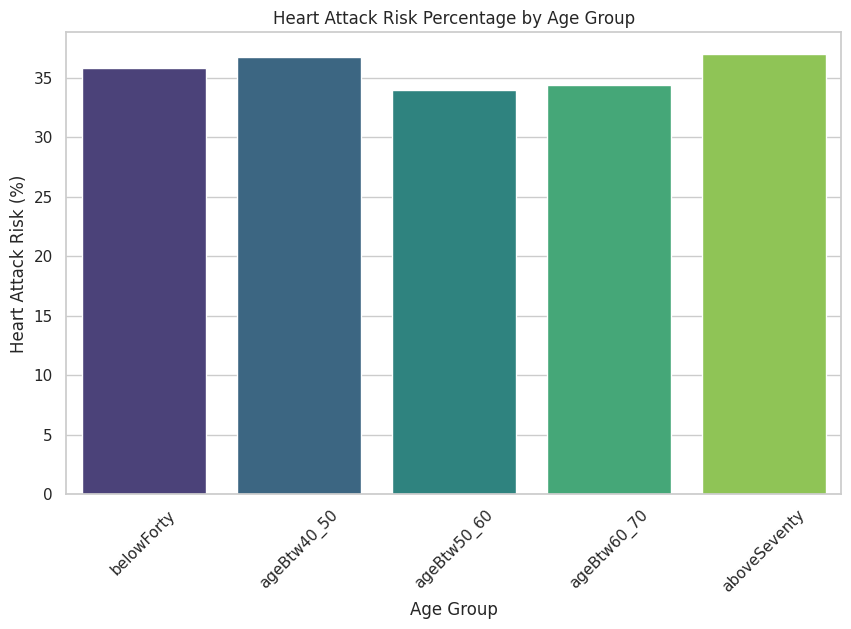

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
x=pivot_table_age.index
sns.barplot(x=x, y='heartAttackRisk(%)',hue = x, data=pivot_table_age.reset_index(), palette="viridis")

# Add titles and labels
plt.title("Heart Attack Risk Percentage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Attack Risk (%)")
plt.xticks(rotation=45)

plt.show()



---


Now let's do geographical analysis with respect to heart attack risk percentage. We only need to use one of the 3 variables dedicated to geography: hemisphere, continent, country. We will see how they correlate to heart attack risk below and decide on that variable based on granularity.




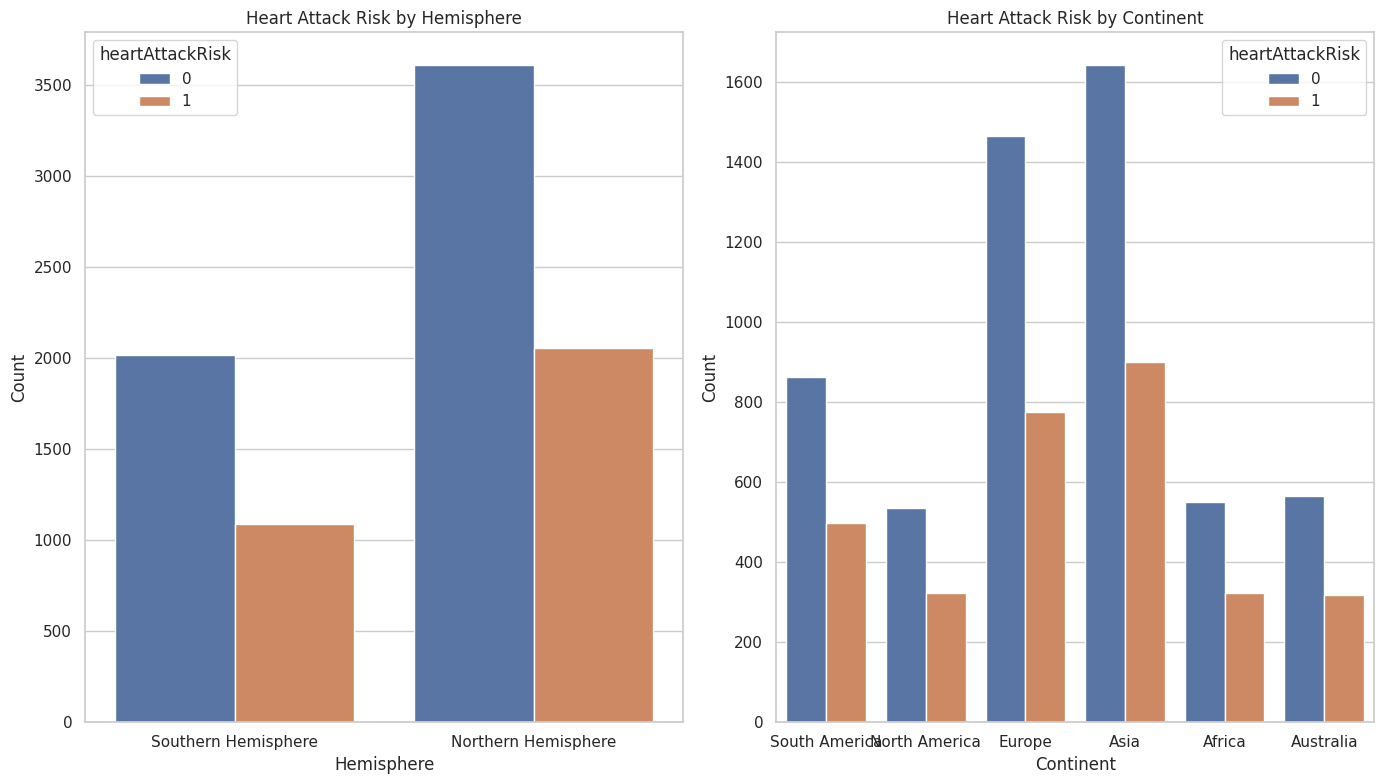

In [64]:
sns.set(style="whitegrid")

# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot heartAttackRisk by hemisphere
sns.countplot(x='hemisphere', hue='heartAttackRisk', data=df, ax=axes[0])
axes[0].set_title("Heart Attack Risk by Hemisphere")
axes[0].set_xlabel("Hemisphere")
axes[0].set_ylabel("Count")

# Plot heartAttackRisk by continent
sns.countplot(x='continent', hue='heartAttackRisk', data=df, ax=axes[1])
axes[1].set_title("Heart Attack Risk by Continent")
axes[1].set_xlabel("Continent")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

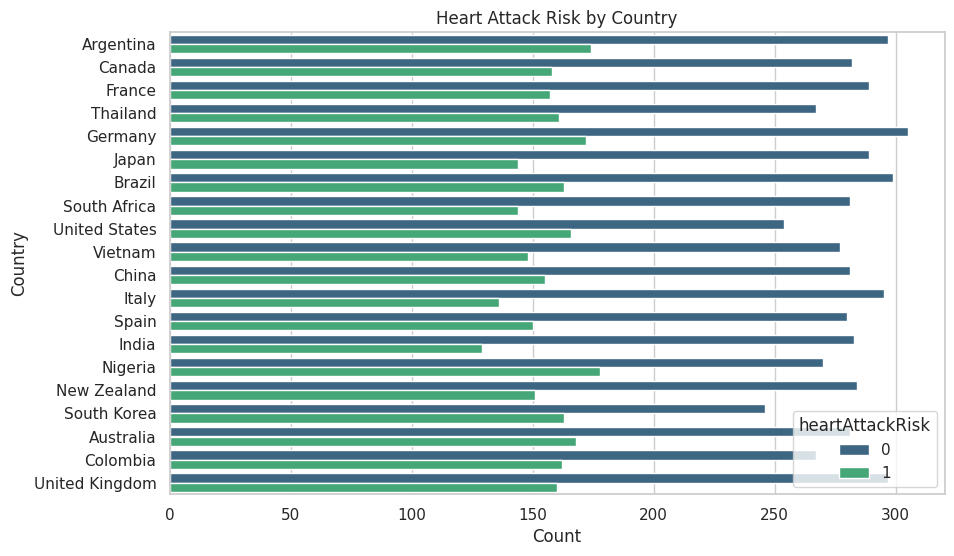

In [65]:
sns.set(style="whitegrid")

# Plot heartAttackRisk by country with countries on the y-axis
plt.figure(figsize=(10, 6))
sns.countplot(y='country', hue='heartAttackRisk', data=df, palette="viridis")
plt.title("Heart Attack Risk by Country")
plt.xlabel("Count")
plt.ylabel("Country")

plt.show()

Visually, we can derive quite a bit of information from the plots, but let's formalize that information through mathematical analysis.

In [66]:
df_north = df[df["hemisphere"]== "Northern Hemisphere"]
df_north[df_north['heartAttackRisk']==1].shape[0]/df_north.shape[0]*100

36.27208480565371

In [67]:
df_south = df[df["hemisphere"]== "Southern Hemisphere"]
df_south[df_south['heartAttackRisk']==1].shape[0]/df_south.shape[0]*100

34.99838865613922

people in the northern hemisphere suffer a higher risk of heart attacks by a good margin. We see a difference of 1.3% in heart attack risk percentage. This makes hemisphere a usable variable in our predictive model later on.

Now to analyze continents:

In [68]:
pivot_table_continents = pd.pivot_table(
    df,
    values='heartAttackRisk',
    index='continent',
    aggfunc=lambda x: x.mean() * 100  # Calculate percentage of heart attack risk
)

# Rename the column for clarity
pivot_table_continents = pivot_table_continents.rename(columns={'heartAttackRisk': 'heartAttackRisk(%)'})
pivot_table_continents

,heartAttackRisk(%)
continent,
Africa,36.884307
Asia,35.391270
Australia,36.085973
Europe,34.582776
North America,37.674419
South America,36.637298


people in north America suffer a significantly higher risk of heart attack as compared to dataset average, while people in europe experience a significantly lower risk compared to the average of 35.8%. Using continents instead of hemispheres offers much more granularity to us, as we witness a range of 3%, while hemispheres only show a range of 1.3%. We can assign values from 0 to 5 in ascending order of heart attack percentage to these continents to transform them to numerical dtypes for usage in model.

In [69]:
df['country'].nunique()

20

In [70]:
pivot_table_countries = pd.pivot_table(
    df,
    values='heartAttackRisk',
    index='country',
    aggfunc=lambda x: x.mean() * 100  # Calculate percentage of heart attack risk
)

# Rename the column for clarity
pivot_table_countries = pivot_table_countries.rename(columns={'heartAttackRisk': 'heartAttackRisk(%)'})
pivot_table_countries

,heartAttackRisk(%)
country,
Argentina,36.942675
Australia,37.416481
Brazil,35.281385
Canada,35.909091
China,35.550459
Colombia,37.762238
France,35.201794
Germany,36.058700
India,31.310680


using country as our location variable offers even better granularity. we get a range of 8.5% of variation in heart attack risk percentage when we use country as our geographical variable. we may drop hemisphere and continent. Now that we have a more visually intuitive pivot table, let us visualize this again

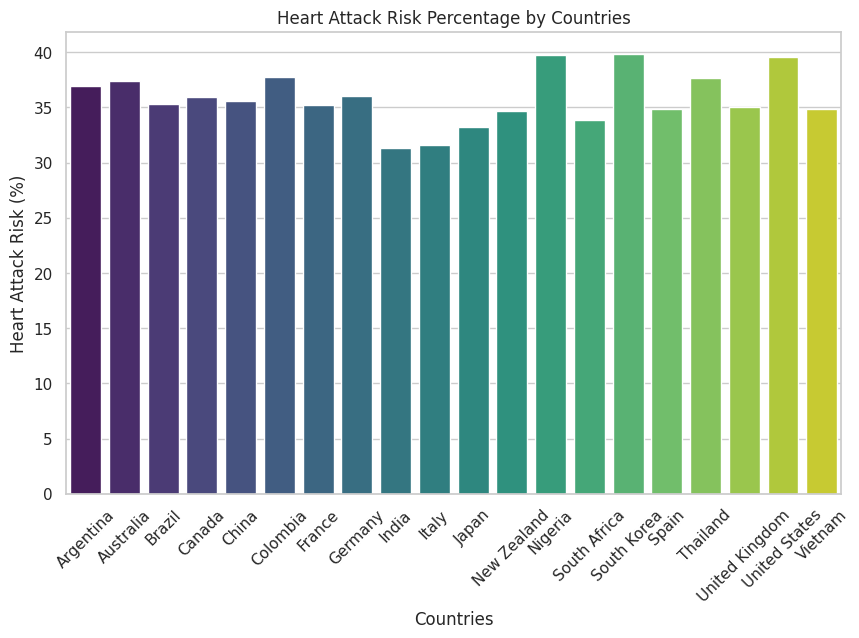

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
x=pivot_table_countries.index
sns.barplot(x=x, y='heartAttackRisk(%)',hue = x, data=pivot_table_countries.reset_index(), palette="viridis")

# Add titles and labels
plt.title("Heart Attack Risk Percentage by Countries")
plt.xlabel("Countries")
plt.ylabel("Heart Attack Risk (%)")
plt.xticks(rotation=45)

plt.show()

In [72]:
order = pivot_table_countries.sort_values(by='heartAttackRisk(%)', ascending=True)
order


,heartAttackRisk(%)
country,
India,31.310680
Italy,31.554524
Japan,33.256351
South Africa,33.882353
New Zealand,34.712644
Vietnam,34.823529
Spain,34.883721
United Kingdom,35.010941
France,35.201794


let us convert country into a numerical variable ascending with heart attack risk

In [73]:
df['country'] = df['country'].replace({
    'India' : '1',
    'Italy' : '2',
    'Japan' : '3',
    'South Africa' : '4',
    'New Zealand' : '5',
    'Vietnam' : '6',
    'Spain' : '7',
    'United Kingdom' : '8',
    'France' : '9',
    'Brazil' : '10',
    'China' : '11',
    'Canada' : '12',
    'Germany' : '13',
    'Argentina' : '14',
    'Australia' : '15',
    'Thailand' : '16',
    'Colombia' : '17',
    'United States' : '18',
    'Nigeria' : '19',
    'South Korea' : '20'
    }).astype(int)



---



dropping all unnecessary columns


In [74]:
df = df.drop("obesity", axis=1)
df = df.drop("alcoholConsumption", axis=1)
df = df.drop("diet", axis=1)
df = df.drop("familyHistory", axis=1)
df = df.drop("sedentaryHoursPerDay", axis=1)
df = df.drop("previousHeartProblems", axis=1)
df = df.drop("medicationUse", axis=1)
df = df.drop("stressLevel", axis=1)
df = df.drop("bmi", axis=1)
df = df.drop("hemisphere", axis=1)
df = df.drop("continent", axis=1)
df = df.drop("bloodPressure", axis=1)
df = df.drop("exerciseHoursPerWeek", axis=1)
df.head(5)
print(df.columns.tolist())

['Patient ID', 'age', 'sex', 'cholesterol', 'heartRate', 'diabetes', 'income', 'triglycerides', 'physicalActivityDaysPerWeek', 'sleepHoursPerDay', 'country', 'heartAttackRisk', 'systolicBloodPressure', 'diastolicBloodPressure']




---


# Research questions:

1.   **How well can a machine learning model trained on these variables predict heart attack risk?**


2.   **Which of these variables holds the greatest weight in predicting a Heart Attack? And what reasonable inference can we draw from it?**








---


# **2.Machine Learning Model:**




## For our ML model we will use Logistic Regression:
1. It's simple and effecient.
2. It provides probability values rather than discrete values.
3. It's especially efficient for binary values.

## Train-Test Split:
To start off we split our dataframe into training and testing data, along with X and Y variables, which represent our attributes and labels respectively.

In [75]:
df_shuffled = df.sample(frac=1, random_state=12030).reset_index(drop=True)
df_shuffled = df_shuffled.drop(columns=['Patient ID'])

split_ratio = 0.75
split_index = int(len(df_shuffled) * split_ratio)

train_data = df_shuffled.iloc[:split_index]
test_data = df_shuffled.iloc[split_index:]

X_train = train_data.drop(columns=['heartAttackRisk'])
y_train = train_data['heartAttackRisk']

X_test = test_data.drop(columns=['heartAttackRisk'])
y_test = test_data['heartAttackRisk']

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 6572
Testing set size: 2191


Then we use a StandardScaler to normalie our data to prepare it for our Logistic Regression model.

In [76]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        X = np.asarray(X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std = np.where(self.std == 0, 1e-10, self.std)

    def transform(self, X):
        X = np.asarray(X)
        X_scaled = (X - self.mean) / self.std
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## Logistic Regression from Scratch:

To implement our model we created and used the functions given.

* `sigmoid(x)`: This is a non-linear "activation" function.

* `cross_entropy_loss(y_true, y_pred)`: The loss function that helps us calculate the gradients for updating our model.

* `fit(x_train, y_train)`: This is where we implement the Gradient Descent algorithm.

* `predict(x_test)`: This predicts whether the label is 0 or 1 for test reviews using learned logistic regression.

* `evaluate(y_true, y_pred)` function that calculates classification accuracy, F1 Score, R^2 and confusion matrix.

In [77]:
class RegularizedLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def cross_entropy_loss(self, y_true, y_pred):
        m = len(y_true)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        reg_loss = (self.lambda_reg / (2 * m)) * np.sum(self.weights ** 2)
        return loss + reg_loss

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0

        training_losses = []

        for _ in range(self.n_iterations):
            linear_model = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/m) * np.dot(X_train.T, (y_pred - y_train)) + (self.lambda_reg / m) * self.weights
            db = (1/m) * np.sum(y_pred - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self.cross_entropy_loss(y_train, y_pred)
            training_losses.append(loss)

        return training_losses

    def predict(self, X_test):
        linear_model = np.dot(X_test, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_model)
        y_pred_label = (y_pred_prob >= 0.5).astype(int)
        return y_pred_prob, y_pred_label

    def evaluate(self, y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)

        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        confusion_matrix = np.array([[tn, fp], [fn, tp]])

        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

        print(f"Confusion Matrix: \nTP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1_score}")

        return accuracy, f1_score, confusion_matrix

    def print_weights(self, feature_names=None):
        """Prints weights and bias."""
        if feature_names is None:
            feature_names = [f"Feature {i+1}" for i in range(len(self.weights))]
        print("Model Weights and Bias:")
        for name, weight in zip(feature_names, self.weights):
            print(f"{name}: {weight}")
        print(f"Bias: {self.bias}")


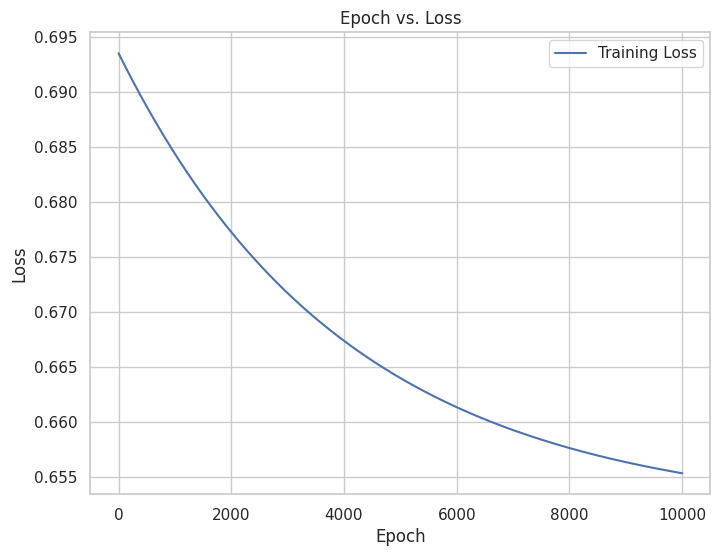

Confusion Matrix: 
TP: 0, TN: 1420, FP: 0, FN: 771
Accuracy: 0.6481058877225011
Precision: 0
Recall: 0.0
F1 Score: 0

Model Evaluation Results:
Accuracy: 0.6481
F1 Score: 0.0000
Confusion Matrix:
[[1420    0]
 [ 771    0]]
Model Weights and Bias:
age: 0.02278569931095623
sex: 0.004296310839405453
cholesterol: 0.02684093092948097
heartRate: -0.007542413133047894
diabetes: 0.02026757479405397
income: 0.02845512341817093
triglycerides: -0.00014854664002772025
physicalActivityDaysPerWeek: -0.012097958812264838
sleepHoursPerDay: -0.006271350191783501
country: 0.06650968127906211
systolicBloodPressure: 0.021496035147177593
diastolicBloodPressure: -0.0019447967712249755
Bias: -0.4006604578506137


In [80]:
model = RegularizedLogisticRegression(learning_rate=0.0005, n_iterations=10000, lambda_reg=0.1)
training_losses = model.fit(X_train_normalized, y_train)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_losses) + 1), training_losses, label="Training Loss")
plt.title("Epoch vs. Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

y_test_prob, y_test_pred = model.predict(X_test_normalized)
accuracy, f1_score, confusion_matrix = model.evaluate(y_test, y_test_pred)

print("\nModel Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix}")
model.print_weights(['age', 'sex', 'cholesterol', 'heartRate', 'diabetes', 'income', 'triglycerides', 'physicalActivityDaysPerWeek', 'sleepHoursPerDay', 'country', 'systolicBloodPressure', 'diastolicBloodPressure'])

## Given our anomoulous results, we decided to run our data using a sklearn Logistic Regression Model to make sure our data isn't overfitted or that our model isn't up to par.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, r2_score

X = df.drop(columns=['heartAttackRisk', 'Patient ID'])
y = df['heartAttackRisk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")


Accuracy: 0.6458
F1 Score: 0.5068
Precision: 0.4171
Recall: 0.6458
Confusion Matrix:
[[1415    0]
 [ 776    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1415
           1       0.00      0.00      0.00       776

    accuracy                           0.65      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.42      0.65      0.51      2191

True Positive (TP): 0
True Negative (TN): 1415
False Positive (FP): 0
False Negative (FN): 776


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m